# Predicting heart disease using machine learning 

This notebook looks into various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting if a patient has heart disease or not based on their medical attributes.

We will take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition 

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from Cleveland Data from the UCI machine learning Repistory .
https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we might pursue the project.

## 4. Features 

This is where you will get different information about each features in your data. 

**Create Data Dictionary** 

1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute) 


## Preparing the tools 
We are going to use pandas, numpy, matplotlib for data analysis and manipulation

In [2]:
# Import all the tools that we might need 

# Regular EDA(exploratory data analysis) and plotting libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Models from scikit learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve


## Load Data 


In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis (EDA))

The goal here is to find out more about the data and become a subject matter expert on the data set you are working with.

1. What question are you trying to solve ?
2. What kinda of data do you have and how to treat different data types ?
3. What is missing from the data and how do you deal with it ?
4. What are the outliers and why should you care about them ?
5. How can you add, change or remove features to get the best out of your data?


In [4]:


df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
# Let's find out how many of each class we have 

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

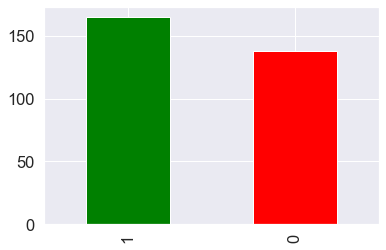

In [103]:
df.target.value_counts().plot(kind="bar", color= ["Green", "Red"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# To check for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparing Attribute 

### Heart Disease Frequency According To Sex 

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


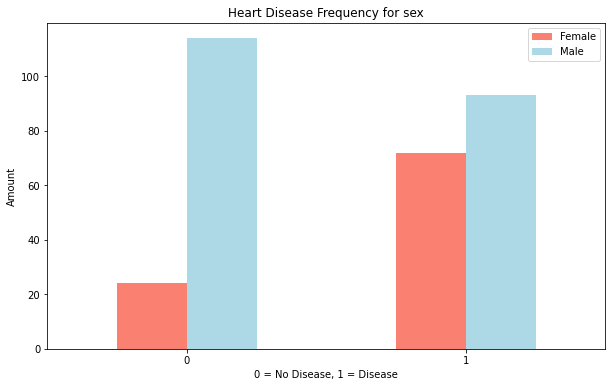

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot.bar(color = ["Salmon", "Lightblue"], figsize= (10, 6));
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel('Amount')
plt.legend(["Female" , "Male"]);
plt.xticks(rotation = 0);

In [13]:
pd.crosstab(df.target, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


In [14]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

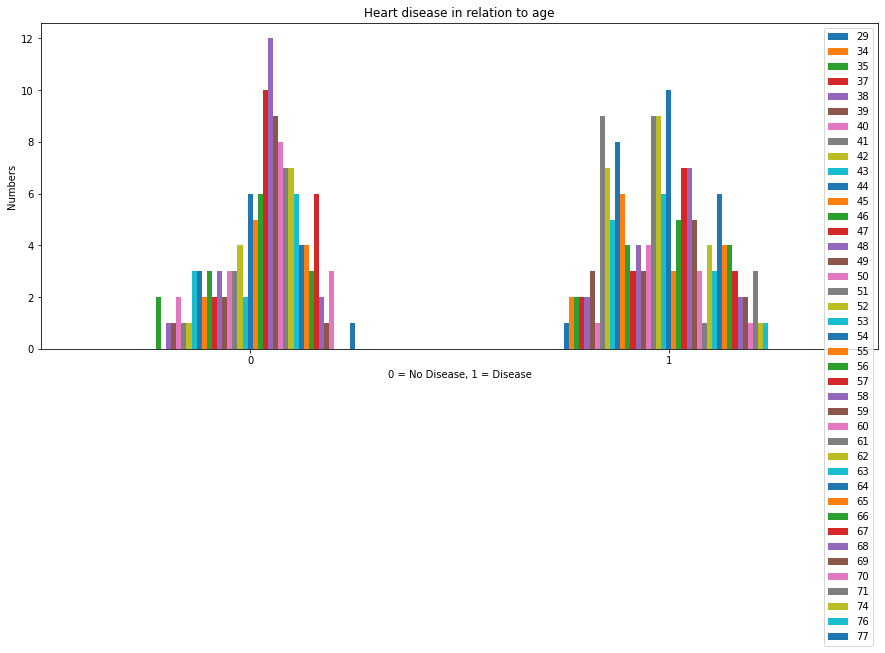

In [15]:
pd.crosstab(df.target, df.age).plot.bar(figsize = (15,6));
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Numbers");
plt.title("Heart disease in relation to age");
plt.xticks(rotation = 0);
plt.legend();

### Age vs Max Heart Rate for Heart Disease 

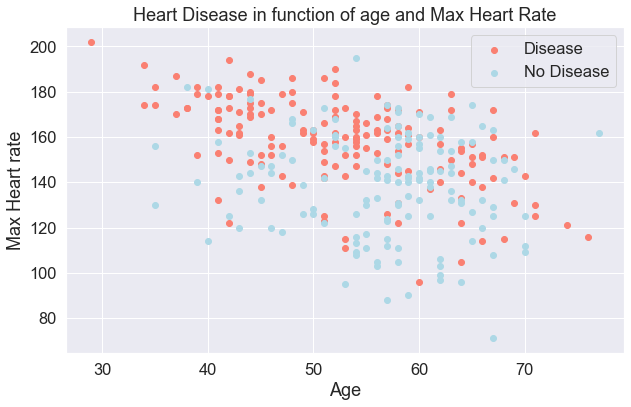

In [109]:
# Create another figure 
plt.figure(figsize = (10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color = "salmon");

# Scatter with negative examples 
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color = "lightblue");

# Add some helpful info
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate");
plt.legend(["Disease", "No Disease"]);

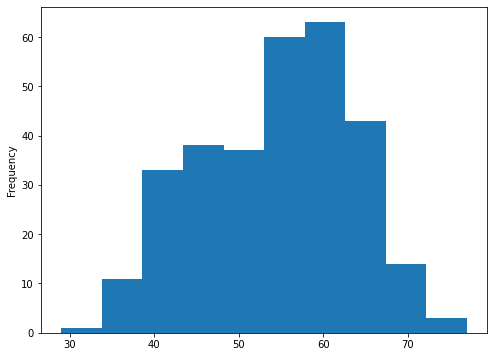

In [17]:
# check the distribution of the age column with a histogram 
df.age.plot.hist(figsize = (8, 6));

### Heart Disease Frequency Chest pain type

In [18]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [19]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


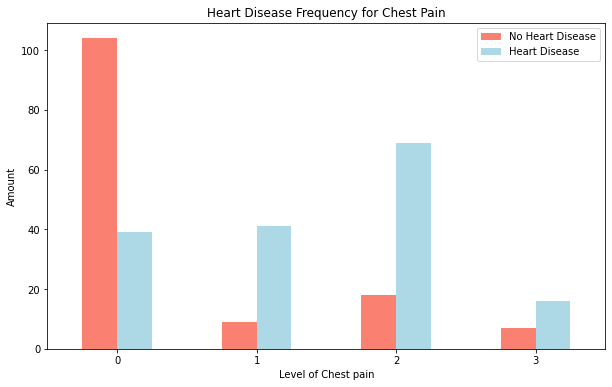

In [20]:
# Make the data more visual
pd.crosstab(df.cp, df.target).plot.bar(color=["salmon", "lightblue"], figsize =(10, 6));

# Add some communication
plt.title("Heart Disease Frequency for Chest Pain")
plt.ylabel("Amount")
plt.xlabel("Level of Chest pain");
plt.legend(["No Heart Disease", "Heart Disease"]);
plt.xticks(rotation = 360);

### Correlation Matrix 

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

In [21]:
# Make a correlation matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


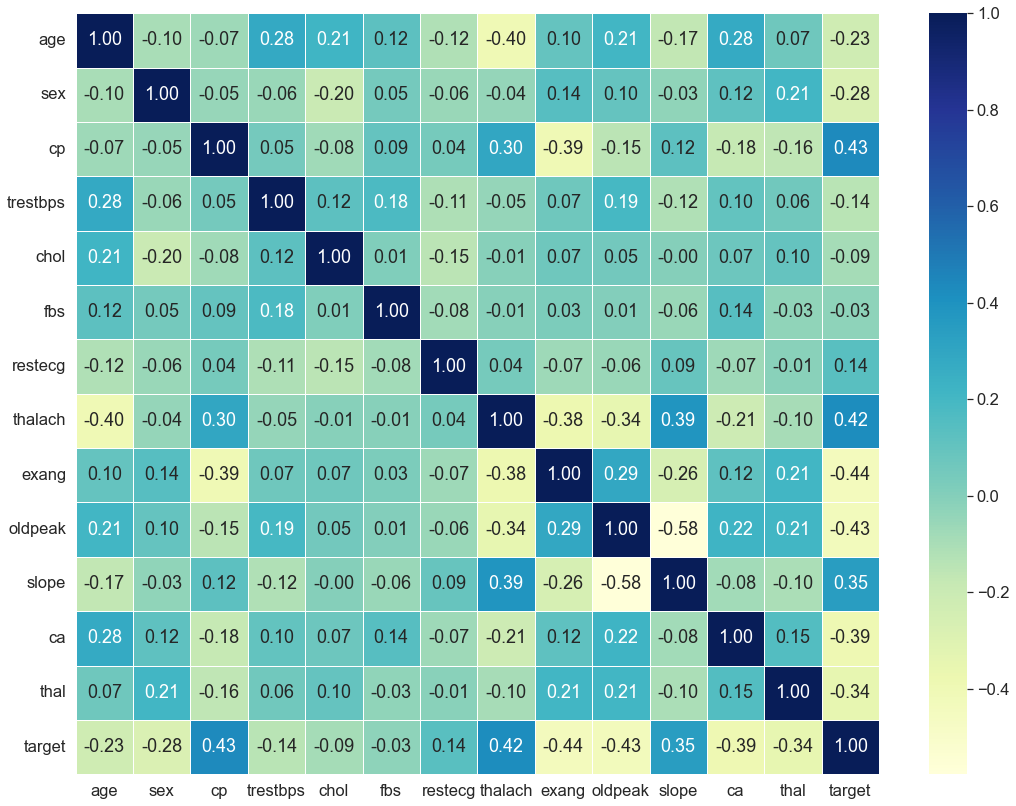

In [125]:
# Let's make it colorful
cor_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18,14))
ax = sns.heatmap(cor_matrix, 
                annot = True,
                fmt = ".2f",
                linewidths= 0.5,
                 cmap = "YlGnBu");
plt.yticks(rotation =0);

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5);  #To adjust the top and bottom values.

## 5. Preparing our Data for Machine Learning 

In [23]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into x and y 
x = df.drop("target", axis = 1)
y = df.target 


In [25]:
y



0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# Split data into Training and Test sets 

np.random.seed(42)

# Split data 
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Choosing the Right Model

We will try 3 different machine learning model 
1. K Neighbors Classifier
2. Logistic Regression
3. Random Forest Classifier 



In [133]:
# Put models in a dictionary 

models = {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Create a function to fit and test model

def fit_test(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_name
        model_scores[name]= model.score(x_test, y_test)
    return model_scores
              

In [134]:
model_scores = fit_test(models = models,
                       x_train = x_train, x_test = x_test,
                       y_train = y_train, y_test = y_test)

model_scores

/Users/personal/Desktop/ML/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

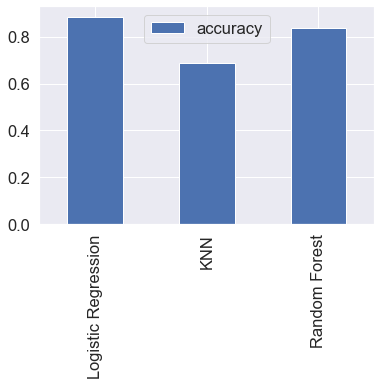

In [146]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

### Let's look at the following :
* Hyperparameter tuning 
* Feature Importance
* Confusion matrix
* Cross Validation
* F1 score
* Recall 
* Precision
* ROC curve 
* Classification report 
* Area Under Curve (AUC)


### Hyperparameter Tuning


In [30]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values 
neighbors = range(1, 21)

# Set up KNN instance
KNN = KNeighborsClassifier()

# Loop through different neighbors 
for i in neighbors:
    KNN.set_params(n_neighbors = i)
    
    # Fit the algorithm 
    KNN.fit(x_train, y_train)
    
    # Update the Training score list 
    train_scores.append(KNN.score(x_train, y_train))
    
    # Update the Test score list
    test_scores.append(KNN.score(x_test, y_test))
    

In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score on the KNN test data : 75.41 %


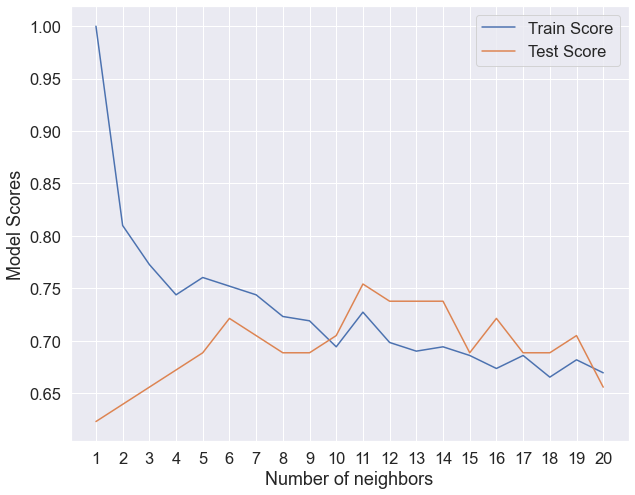

In [152]:
plt.figure(figsize = (10,8))

plt.plot(neighbors,train_scores, label = "Train Score")

plt.plot(neighbors, test_scores, label = "Test Score");

plt.xlabel("Number of neighbors")

plt.xticks(np.arange(1, 21, 1));

plt.ylabel("Model Scores");

plt.legend();



print(f"Maximum score on the KNN test data : {max(test_scores)*100:.2f} %")


## Hyperparameter Tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression 
* RandomForestClassifier

... with RandomizedSearchCV

In [34]:
# Create a hyperparametr grid for logistic regression
log_grid = {"C": np.logspace(-4, 4, 20),
           "solver": ["liblinear"]}

# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}


In [35]:
# Tune Logistics Regression 
np.random.seed(42)

# Set up hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_grid,
                               cv =5, n_iter = 20, verbose = True)

# Fit Random hyperparameter search model for Logistic Regression 
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
# To check for best parameter 
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [38]:
# Tune Random Forest Classifier 
np.random.seed(42)

# Set up Random hyperparamter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                               param_distributions= rf_grid,
                                cv = 5, n_iter = 20, verbose = True)

# Fit Random hyperparamter search model for Random Forest Classifier 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
# Evaluate how well the rs_rf works on the test data 
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

* Trying to improve with our machine learning with GridSearchCV

In [41]:
# Tuning our logistic Regression using GridSearchCV

np.random.seed(42)
# Create hyperparameter grid for Logistic Regression 
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver":["liblinear"]}

# Set up Grid hyperparameter search for Logistic Regression 
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid,
                          cv = 5,verbose = True)

# Fit grid hyperparameter on search model 
gs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
# Check best param
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
# Evaluate on search model 
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [44]:
# Tuning RandomForestClassifier using Grid Search
np.random.seed(42)
rf_grid = {"n_estimators": np.arange(10, 1000, 200), "min_samples_split": np.arange(2,20,5),
          "min_samples_leaf": np.arange(1, 20, 5), "max_depth": [None, 3, 5, 10]}

# Create hyperparamter on Grid Search for Random Forest Classifier
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid = rf_grid, cv = 5, verbose = True )

# Fit Grid hyperparameter Search model for Random Forest Classifier
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  6, 11, 16]),
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([ 10, 210, 410, 610, 810])},
             verbose=True)

In [47]:
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 12,
 'n_estimators': 10}

In [48]:
gs_rf.score(x_test, y_test)

0.9016393442622951

## Evaluating our Model 

 Evaluating our tuned machine learning  model beyong accuracy 
 * ROC curve, AUC Score
 * Confusion Matrix
 * Classification report 
 * Recall
 * F1_score
 * Precision
 
 ..... and it will be great if cross validation is introduced 
 
 To make comparison and evaluate our model, first we need predictions...
 

In [45]:
# Make predictions with tuned model 
y_preds = gs_log_reg.predict(x_test)
y_preds 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [53]:
# Make predictions with tuned model 
y_preds2 = gs_rf.predict(x_test)
y_preds2 

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/Users/personal/Desktop/ML/heart-disease-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


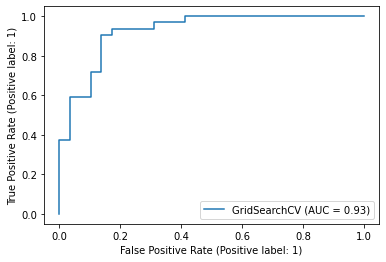

In [50]:
# Plot Roc Curve and Calculate AUC metrics
plot_roc_curve(gs_log_reg, x_test, y_test);

/Users/personal/Desktop/ML/heart-disease-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


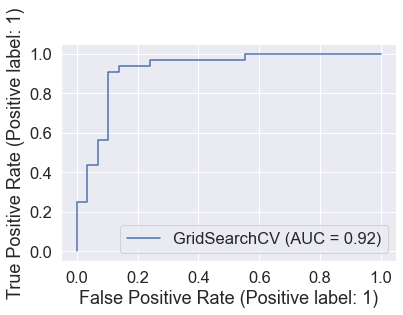

In [153]:
# Plot ROC curve on our Grid Search RandomForestClassifier model
plot_roc_curve(gs_rf, x_test, y_test);

In [52]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [54]:
print(confusion_matrix(y_test, y_preds2))

[[26  3]
 [ 3 29]]


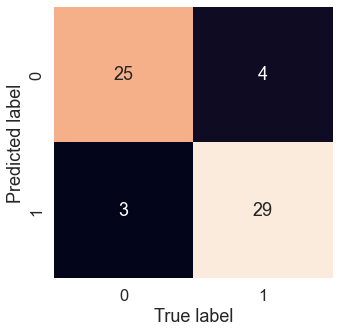

In [156]:
# Visualize our confusion matrix
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds), annot = True ,
                                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    #bottom, top = ax.get_ylim
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

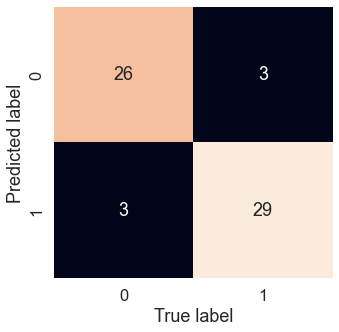

In [59]:
plot_conf_mat(y_test, y_preds2)

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metric using cross validation

We are going to calculate precision, F1_score, recall of our metrics using cross val score.



In [63]:
# Check best paramter 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
# Create a new classifier with best parameters 
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [73]:
# Cross-validated F1_score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring = 'f1')
cv_f1.mean()

0.8673007976269721

In [75]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_recall.mean()

0.9212121212121213

In [76]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, x, y, cv= 5, scoring = "precision")
cv_precision.mean()

0.8207936507936507

In [78]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")
cv_accuracy.mean()

0.8446994535519124

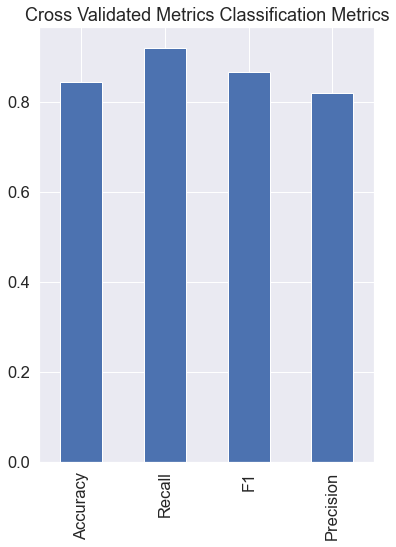

In [160]:
# Visualize our cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_accuracy.mean(), "Recall": cv_recall.mean(),
                          "F1": cv_f1.mean(), "Precision":cv_precision.mean()}, index = [0])
cv_metrics.T.plot.bar(figsize= (6,8), 
                      title = "Cross Validated Metrics Classification Metrics",
                     legend = False);

### Feature Importance

This is another way of asking which feature contributed most to the outcome of the output and how did they contribute.

Finding Future importance is different for each model.

To find the future importance for a model e.g., LogisticRegression is to search for {model name} future importance.

Let's find the Future importance of our Logistic Regression...


In [86]:
# Fit an instance of Logistic Regression 
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [90]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [96]:
# Match coef's of features to columns.
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

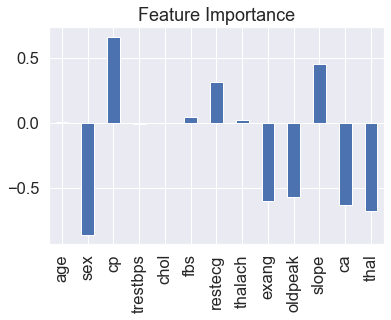

In [168]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend= False);


## Review The Project

### 6. Experimentation

If you haven't hit your evaluation metrics yet, ask yourself 
* if you could get more samples 
* if you could try a better model ? like CatBoost, XGBoost 
* Could we improve the current model ? beyond what we have had.
* If model is good enough (you have hit your evaluation metric), how will you export and share with others ?

